In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [3]:
Fs = 1000  # Sampling frequency in Hz
t = np.arange(0, 1, 1/Fs)  # Time vector from 0 to 1 second

freqs = np.arange(10, 110, 10)  # [10, 20, ..., 100]


## Generate signals

In [4]:
signals = []

for f in freqs:
    signal = np.sin(2 * np.pi * f * t)
    signals.append(signal)

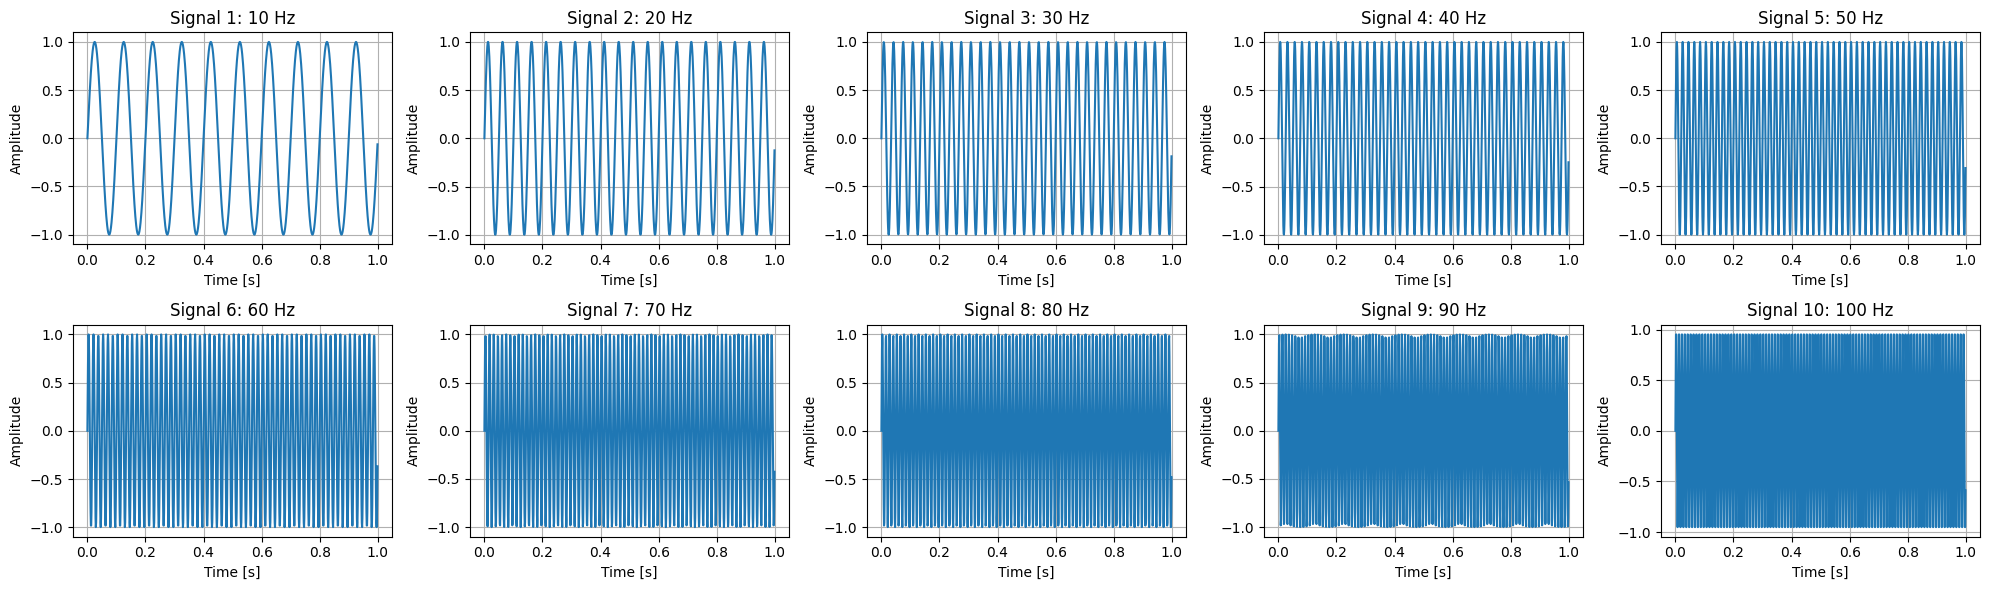

In [7]:
# Plot the signals
fig, axs = plt.subplots(2, 5, figsize=(20, 6))

for i, signal in enumerate(signals):
    row = i // 5
    col = i % 5
    axs[row, col].plot(t, signal)
    axs[row, col].set_title(f'Signal {i+1}: {freqs[i]} Hz')
    axs[row, col].set_xlabel('Time [s]')
    axs[row, col].set_ylabel('Amplitude')
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()


## Add Noise

In [9]:
noisy_signals = []

for signal in signals:
    amplitude = np.max(np.abs(signal))
    noise_std = 0.3 * amplitude
    noise = np.random.normal(0, noise_std, size=signal.shape)
    noisy_signal = signal + noise
    noisy_signals.append(noisy_signal)


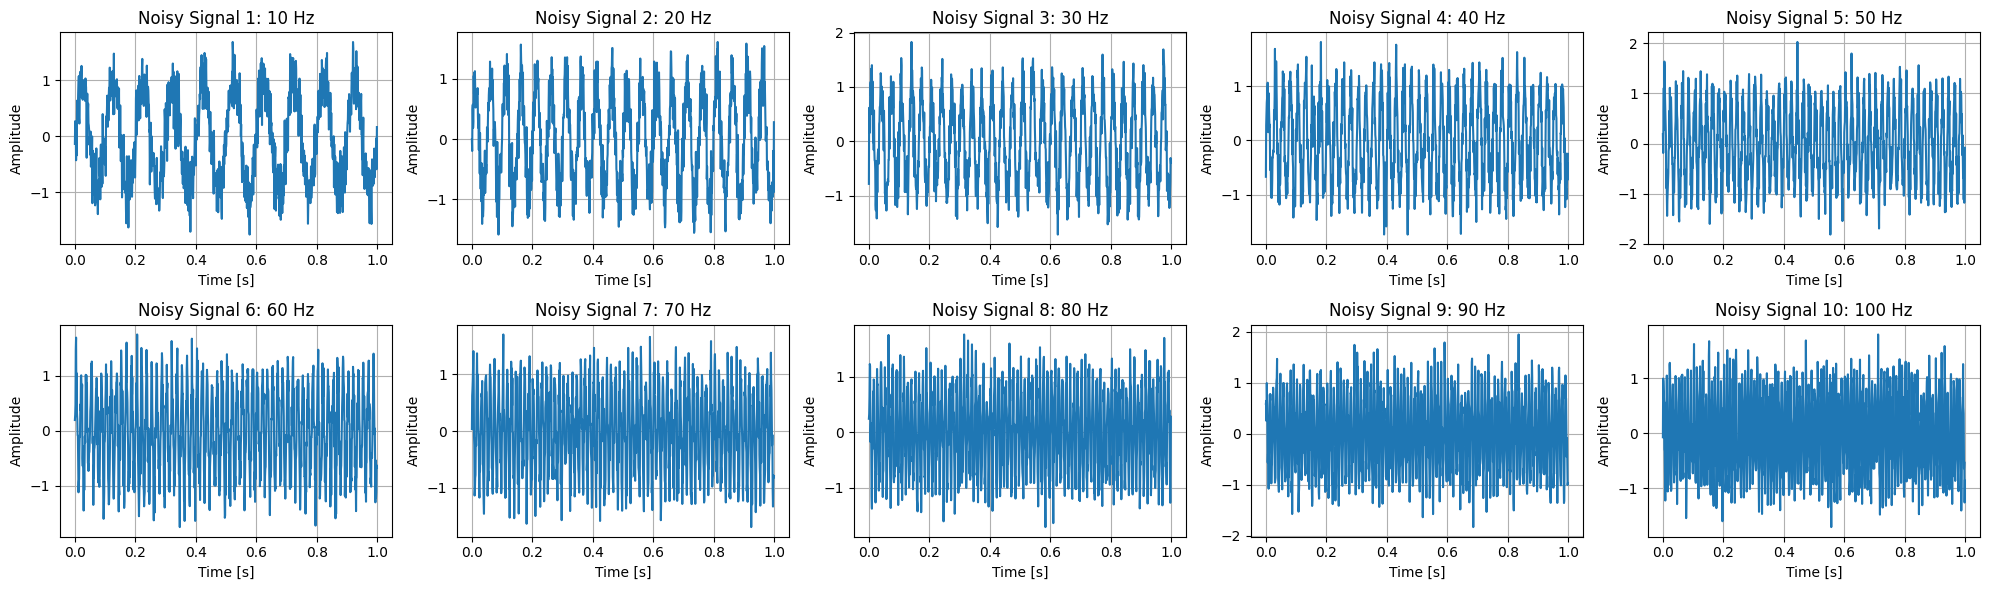

In [10]:
# Plot the noisy signals
fig, axs = plt.subplots(2, 5, figsize=(20, 6))

for i, noisy_signal in enumerate(noisy_signals):
    row = i // 5
    col = i % 5
    axs[row, col].plot(t, noisy_signal)
    axs[row, col].set_title(f'Noisy Signal {i+1}: {freqs[i]} Hz')
    axs[row, col].set_xlabel('Time [s]')
    axs[row, col].set_ylabel('Amplitude')
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()


## Compute the FFT of the noisy signals

In [11]:
fft_signals = []
fft_freqs = np.fft.fftfreq(len(t), d=1/Fs)

for noisy_signal in noisy_signals:
    fft_signal = np.fft.fft(noisy_signal)
    fft_signals.append(fft_signal)


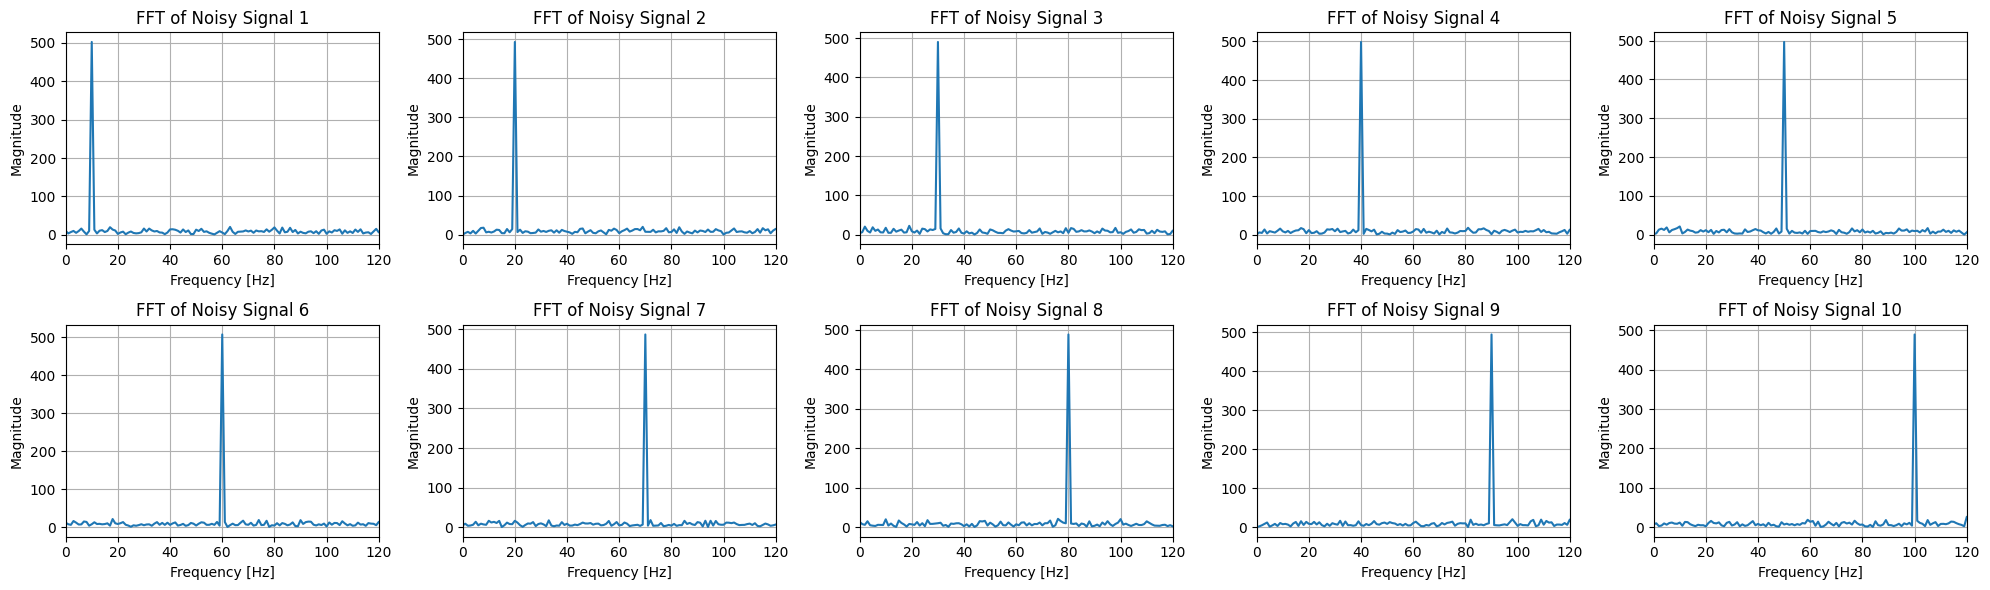

In [15]:
# Plot the FFT magnitude spectra
fig, axs = plt.subplots(2, 5, figsize=(20, 6))

for i, fft_signal in enumerate(fft_signals):
    row = i // 5
    col = i % 5
    axs[row, col].plot(fft_freqs[:len(fft_freqs)//2], 
                       np.abs(fft_signal)[:len(fft_signal)//2])
    axs[row, col].set_title(f'FFT of Noisy Signal {i+1}')
    axs[row, col].set_xlabel('Frequency [Hz]')
    axs[row, col].set_ylabel('Magnitude')
    axs[row, col].grid(True)
    axs[row, col].set_xlim(0, 120)

plt.tight_layout()
plt.show()


## Reconstruct signals using IFFT

In [16]:
reconstructed_signals = []

for fft_signal in fft_signals:
    reconstructed_signal = np.fft.ifft(fft_signal)
    reconstructed_signal = np.real(reconstructed_signal)
    reconstructed_signals.append(reconstructed_signal)


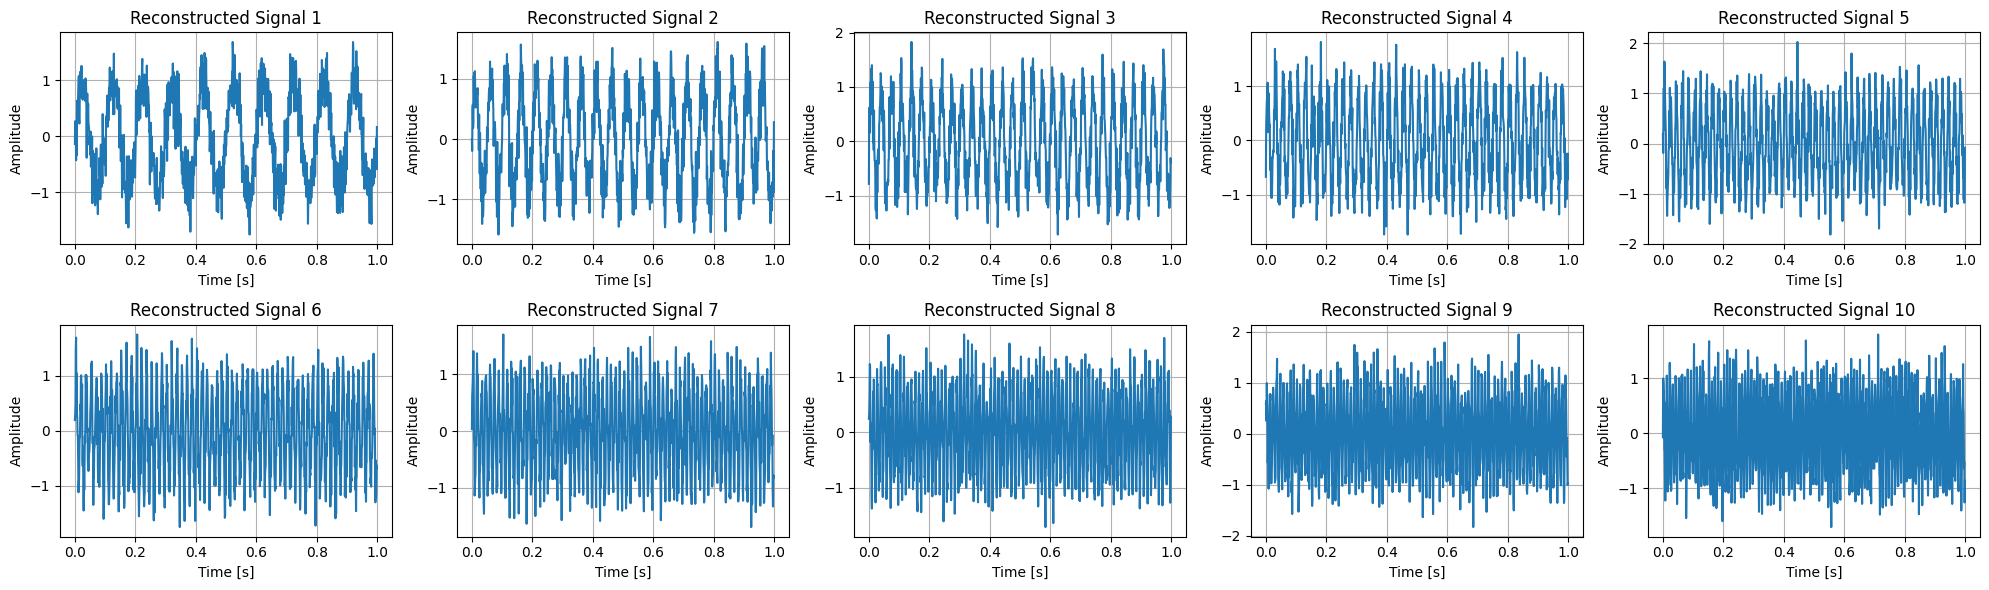

In [17]:
# Plot the reconstructed signals
fig, axs = plt.subplots(2, 5, figsize=(20, 6))

for i, reconstructed_signal in enumerate(reconstructed_signals):
    row = i // 5
    col = i % 5
    axs[row, col].plot(t, reconstructed_signal)
    axs[row, col].set_title(f'Reconstructed Signal {i+1}')
    axs[row, col].set_xlabel('Time [s]')
    axs[row, col].set_ylabel('Amplitude')
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()


## Filtering the FFTs

In [22]:
filtered_fft_signals = []

for i, fft_signal in enumerate(fft_signals):
    target_freq = freqs[i]
    bandwidth = 2  # Bandwidth around the target frequency

    mask = np.abs(fft_freqs - target_freq) <= bandwidth
    mask |= np.abs(fft_freqs + target_freq) <= bandwidth

    filtered_fft_signal = fft_signal * mask
    filtered_fft_signals.append(filtered_fft_signal)


# Reconstruct the signals using IFFT
filtered_signals = []
for filtered_fft_signal in filtered_fft_signals:
    reconstructed_signal = np.fft.ifft(filtered_fft_signal)
    # Since we're dealing with real signals, take the real part
    reconstructed_signal = np.real(reconstructed_signal)
    filtered_signals.append(reconstructed_signal)

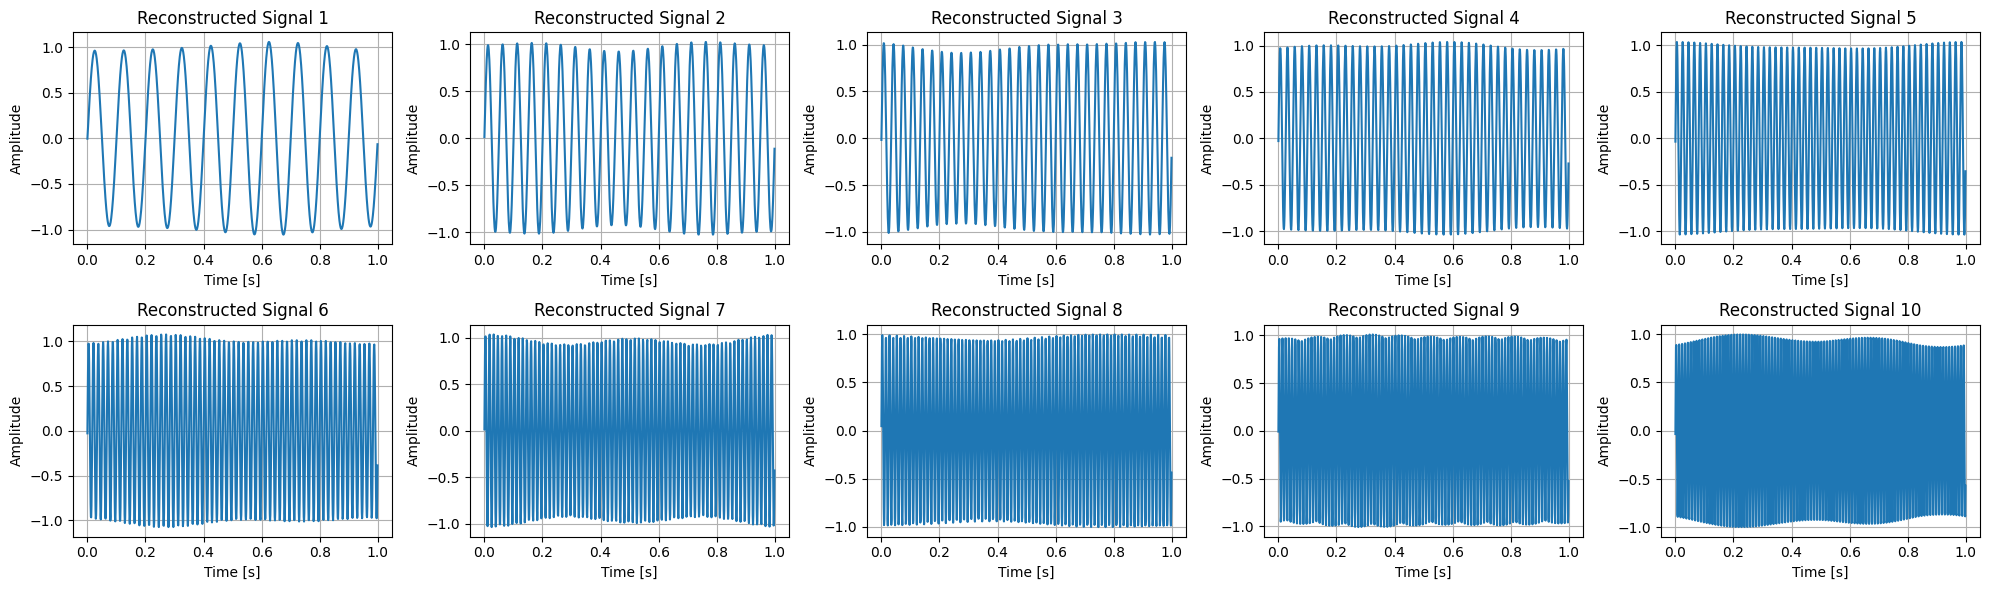

In [23]:
fig, axs = plt.subplots(2, 5, figsize=(20, 6))
for i, filtered_signal in enumerate(filtered_signals):
    row = i // 5
    col = i % 5
    axs[row, col].plot(t, filtered_signal)
    axs[row, col].set_title(f'Reconstructed Signal {i+1}')
    axs[row, col].set_xlabel('Time [s]')
    axs[row, col].set_ylabel('Amplitude')
    axs[row, col].grid(True)
plt.tight_layout()
plt.show()


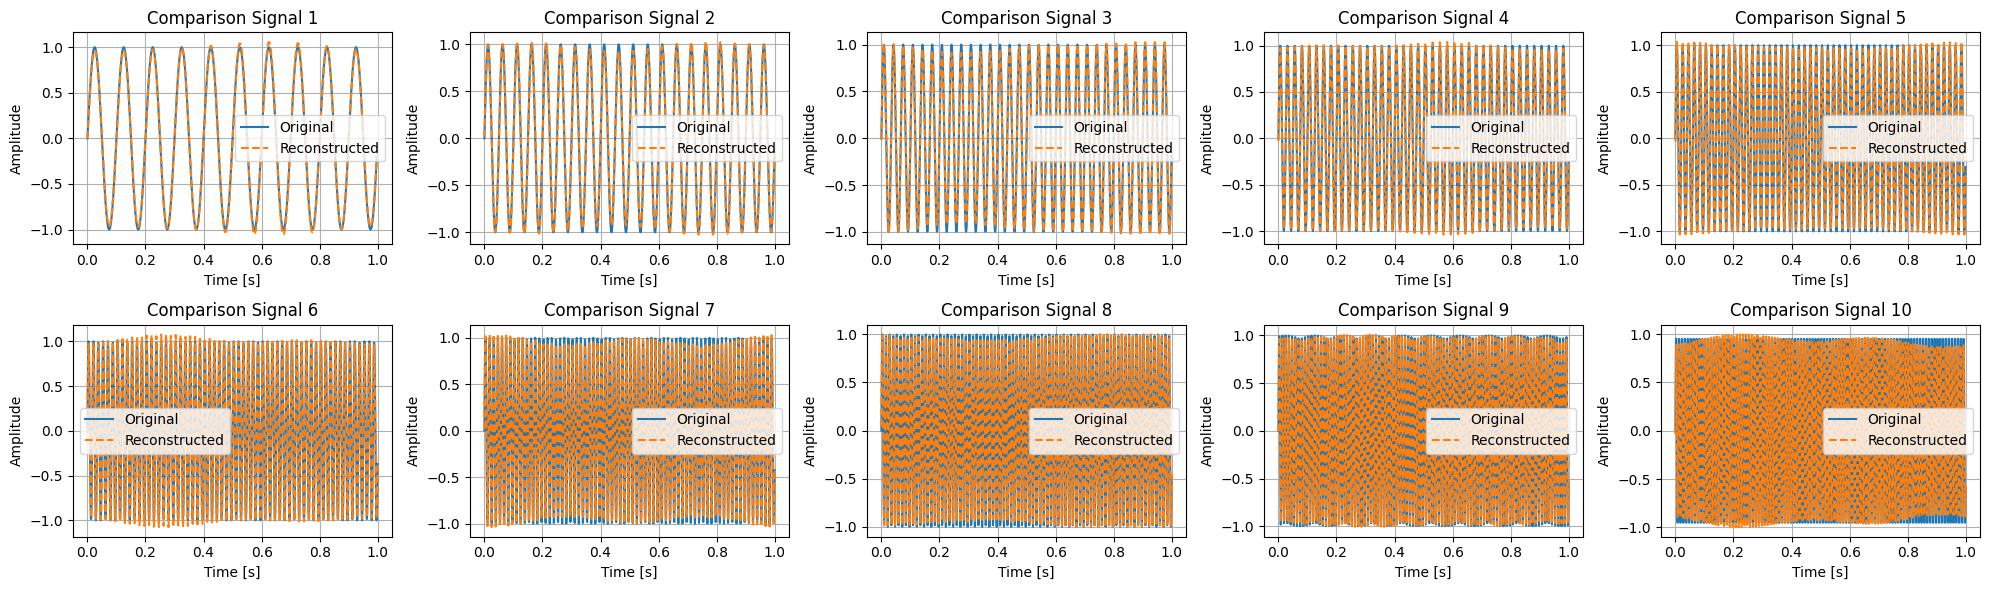

In [24]:
fig, axs = plt.subplots(2, 5, figsize=(20, 6))
for i in range(len(signals)):
    row = i // 5
    col = i % 5
    axs[row, col].plot(t, signals[i], label='Original')
    axs[row, col].plot(t, filtered_signals[i], label='Reconstructed', linestyle='--')
    axs[row, col].set_title(f'Comparison Signal {i+1}')
    axs[row, col].set_xlabel('Time [s]')
    axs[row, col].set_ylabel('Amplitude')
    axs[row, col].grid(True)
    axs[row, col].legend()
plt.tight_layout()
plt.show()